# Credit EDA Case Study : RISK ANALYSIS
##### By Abhishek Hegde & Kumar Sambhawam

## FIRST STEPS :Importing the necessary libraries & files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('application_data.csv')
data_prev = pd.read_csv('previous_application.csv')

In [2]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
print(data.shape)

(307511, 122)


In [5]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## MISSING VALUE ANALYSIS

- Dropping all columns with >45% missing values

In [7]:
data = data.loc[:, data.isnull().mean()*100<45]

In [8]:
!pip install missingno

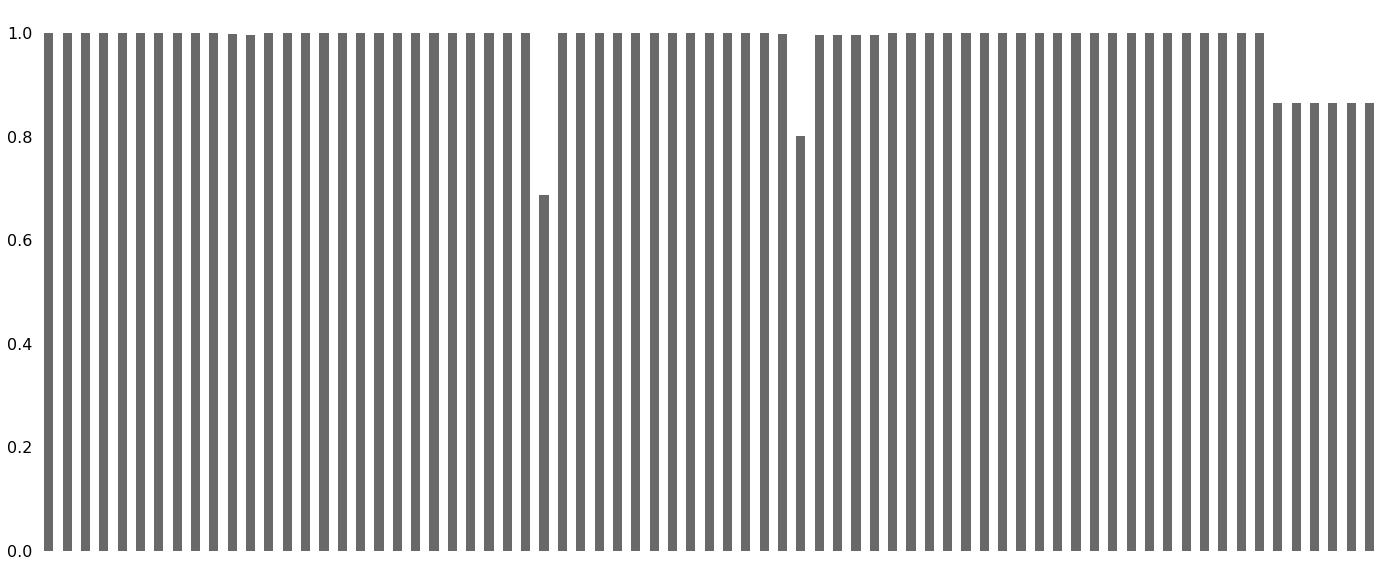

In [9]:
import missingno as msno
msno.bar(data)

In [10]:
data.isna().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### OCCUPATION_TYPE Missing values

In [11]:
data.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [12]:
data[data.OCCUPATION_TYPE.isnull() == True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-16010,-1185,-5034.0,-4392,1,1,0,1,1,0,NaN,3.0,1,1,SATURDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.661025,0.199771,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,-23125,365243,-5485.0,-4115,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,0.307082,0

#### - Better to be left missing as imputation with median or mode value will result in loss of data integrity, distort original properties (distribution ratio of categories).

#### EXT_SOURCE_3 Missing values

In [13]:
data.EXT_SOURCE_3.isna().mean()*100

19.825307062186393

#### - Around 20% values missing

In [14]:
data.EXT_SOURCE_3.describe()[1:-1]

mean    0.510853
std     0.194844
min     0.000527
25%     0.370650
50%     0.535276
75%     0.669057
Name: EXT_SOURCE_3, dtype: float64

##### Majority of values b/w 0.37 to 0.67

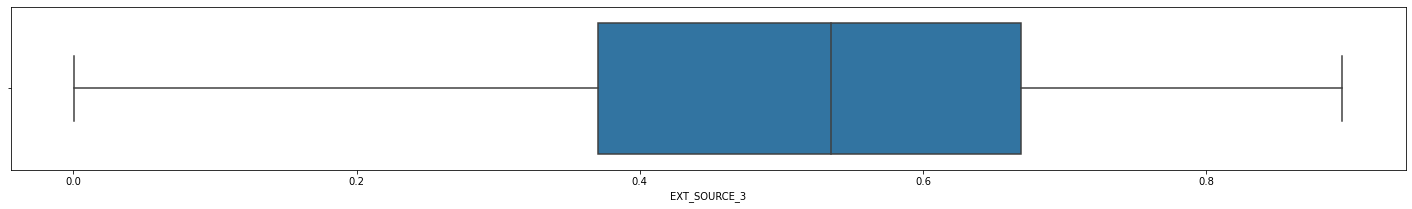

In [15]:
plt.figure(figsize=(25,3))
sns.boxplot(data.EXT_SOURCE_3)

#### -No outliers as such, best to IMPUTE missing values with MEAN

In [16]:
data.EXT_SOURCE_3.mean()

0.5108529061800121

#### AMT_REQ_CREDIT_BUREAU_HOUR Missing values

In [17]:
data.AMT_REQ_CREDIT_BUREAU_HOUR.isna().mean()*100

13.501630835970097

In [18]:
# checking whether the same applications have all the other related fields missing too
data[data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull() == True].iloc[:,-5:].isna().sum()

AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

#### -As it seems, aroung 13.5% applications have all the Credit Bureau Enquiry frequencies missing.

In [19]:
data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

#### -Safe to impute NAs with 0. 

In [20]:
data.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

#### -Safe to impute NAs with 0. 

In [21]:
data.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True)*100

0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

#### -Safe to impute NAs with 0. 

In [22]:
data.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True)*100

0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
27.0     0.000376
22.0     0.000376
23.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [23]:
data.AMT_REQ_CREDIT_BUREAU_MON.median()

0.0

#### -Safe to impute NAs with 0. (median)

In [24]:
data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
7.0       0.002632
8.0       0.002632
19.0      0.000376
261.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [25]:
data.AMT_REQ_CREDIT_BUREAU_QRT.median()

0.0

#### -Safe to impute NAs with 0. 

In [26]:
data.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)*100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
21.0     0.000376
23.0     0.000376
25.0     0.000376
20.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [27]:
data.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

#### -Safe to impute NAs with 1.(median) 

## DATATYPE CHECK

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

### TARGET DataType

In [29]:
data.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

#### -Should clearly be a category and not int64.

In [30]:
data.TARGET = data.TARGET.astype('category')

In [31]:
data.TARGET.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

### CNT_CHILDREN DataType

In [32]:
data.CNT_CHILDREN.nunique()

15

In [33]:
data.CNT_CHILDREN.dtype

dtype('int64')

#### -Should be a category and not int64.

In [34]:
data.CNT_CHILDREN = data.CNT_CHILDREN.astype('category')

In [35]:
data.CNT_CHILDREN.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 19], ordered=False)

### Same way any column with less than 50 unique values should be made a category.

In [36]:
for col in data.columns:
    if data[col].nunique() < 50:
        data[col] = data[col].astype('category')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  category
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Correcting Date values

- Converting them into positive YEAR values.

In [38]:
data.DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [39]:
data.DAYS_BIRTH = round(data.DAYS_BIRTH.abs()/365,0)

In [40]:
data.DAYS_EMPLOYED = round(data.DAYS_EMPLOYED.abs()/365,0)

In [41]:
data.DAYS_REGISTRATION = round(data.DAYS_REGISTRATION.abs()/365,0)

In [42]:
data.DAYS_ID_PUBLISH = round(data.DAYS_ID_PUBLISH.abs()/365,0)

In [43]:
data.DAYS_EMPLOYED

0            2.0
1            3.0
2            1.0
3            8.0
4            8.0
           ...  
307506       1.0
307507    1001.0
307508      22.0
307509      13.0
307510       3.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [44]:
data.DAYS_REGISTRATION

0         10.0
1          3.0
2         12.0
3         27.0
4         12.0
          ... 
307506    23.0
307507    12.0
307508    18.0
307509     7.0
307510    14.0
Name: DAYS_REGISTRATION, Length: 307511, dtype: float64

In [45]:
data.DAYS_ID_PUBLISH

0          6.0
1          1.0
2          7.0
3          7.0
4          9.0
          ... 
307506     5.0
307507    11.0
307508    14.0
307509     3.0
307510     1.0
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: float64

## OUTLIER ANALYSIS

#### AMT_CREDIT

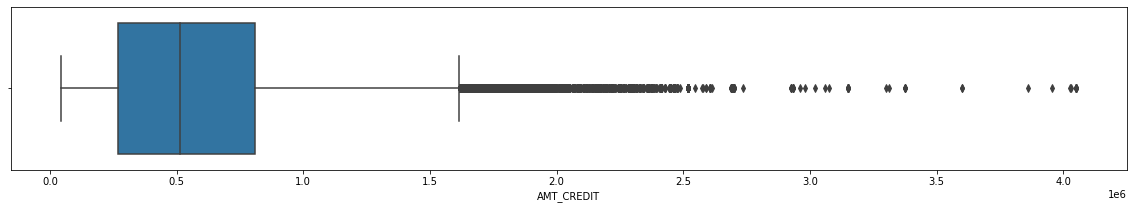

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

 - Anything above 1616625.0 is an outlier


In [46]:
plt.figure(figsize = (20, 3))
sns.boxplot(data['AMT_CREDIT'])
plt.show()
print(data['AMT_CREDIT'].describe(),end='\n\n')
iqr = (data['AMT_CREDIT'].quantile(0.75) - data['AMT_CREDIT'].quantile(0.25))*1.5+data['AMT_CREDIT'].quantile(0.75)

print(f'\033[1m - Anything above {iqr} is an outlier')

#### AMT_ANNUITY

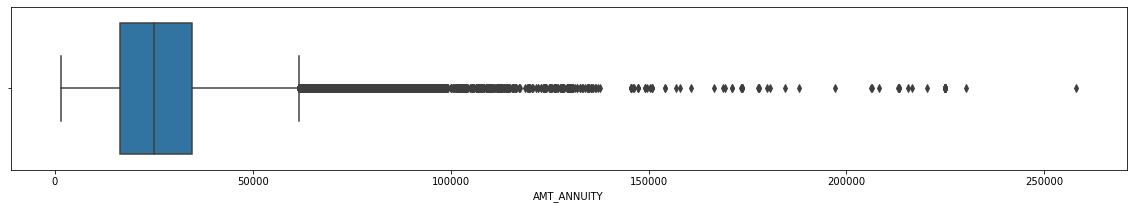

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

 - Anything above 61704.0 is an outlier


In [47]:
plt.figure(figsize = (20, 3))
sns.boxplot(data['AMT_ANNUITY'])
plt.show()
print(data['AMT_ANNUITY'].describe(),end='\n\n')
iqr = (data['AMT_ANNUITY'].quantile(0.75) - data['AMT_ANNUITY'].quantile(0.25))*1.5+data['AMT_ANNUITY'].quantile(0.75)

print(f'\033[1m - Anything above {iqr} is an outlier')

#### AMT_INCOME_TOTAL

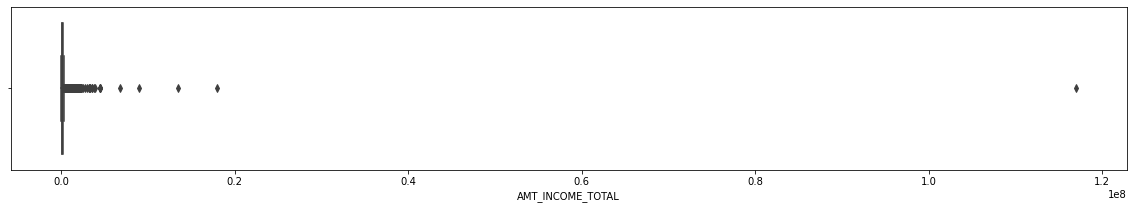

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

 - Anything above 337500.0 is an outlier


In [48]:
plt.figure(figsize = (20, 3))
sns.boxplot(data['AMT_INCOME_TOTAL'])
plt.show()
data['AMT_INCOME_TOTAL'].quantile([0.1,0.25,0.5,0.75,0.9,.95,.99,1])

print(data['AMT_INCOME_TOTAL'].describe(),end='\n\n')
iqr = (data['AMT_INCOME_TOTAL'].quantile(0.75) - data['AMT_INCOME_TOTAL'].quantile(0.25))*1.5+data['AMT_INCOME_TOTAL'].quantile(0.75)

print(f'\033[1m - Anything above {iqr} is an outlier')

#### EXT_SOURCE_2

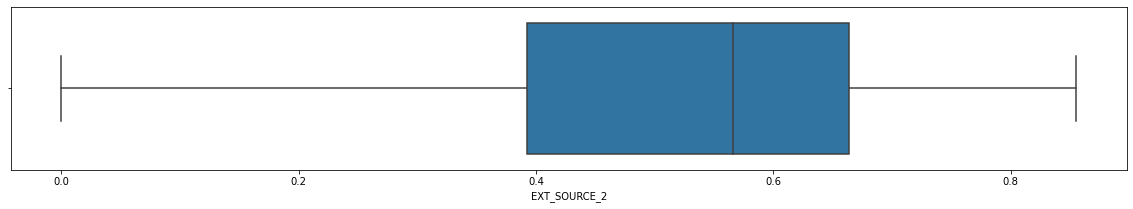

 - No outliers


In [49]:
plt.figure(figsize = (20, 3))
sns.boxplot(data['EXT_SOURCE_2'])
plt.show()
round(data['EXT_SOURCE_2'].describe(),2)

print(f'\033[1m - No outliers')

#### AMT_GOODS_PRICE

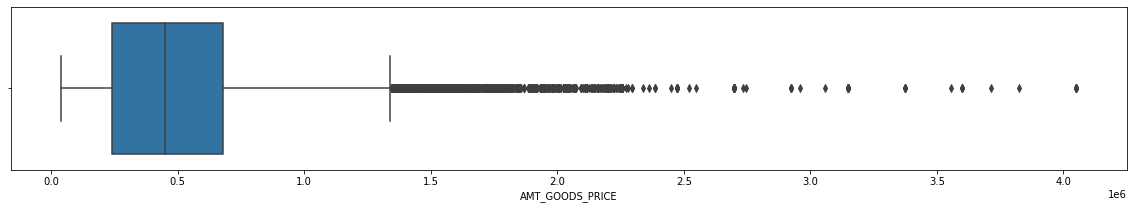

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

 - Anything above 1341000.0 is an outlier


In [50]:
plt.figure(figsize = (20, 3))
sns.boxplot(data['AMT_GOODS_PRICE'])
plt.show()
data['AMT_GOODS_PRICE'].quantile([0.1,0.25,0.5,0.75,0.9,.95,.99,1])

print(data['AMT_GOODS_PRICE'].describe(),end='\n\n')
iqr = (data['AMT_GOODS_PRICE'].quantile(0.75) - data['AMT_GOODS_PRICE'].quantile(0.25))*1.5+data['AMT_GOODS_PRICE'].quantile(0.75)

print(f'\033[1m - Anything above {iqr} is an outlier')

### Visualizing these columns before outlier handling

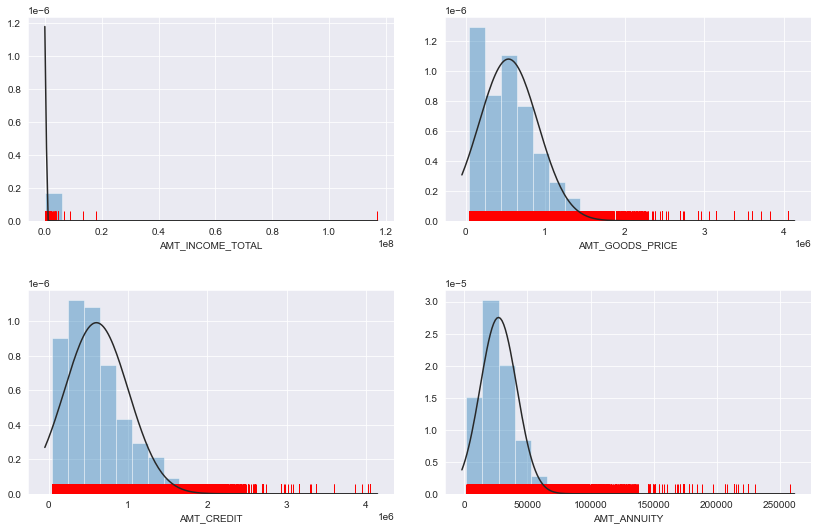

In [51]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.subplot(2,2,1)
sns.distplot(data.AMT_INCOME_TOTAL, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)


plt.subplot(2,2,2)
sns.distplot(data.AMT_GOODS_PRICE, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)


plt.subplot(2,2,3)
sns.distplot(data.AMT_CREDIT, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)


plt.subplot(2,2,4)
sns.distplot(data.AMT_ANNUITY, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)
plt.tight_layout(pad=3.0)

#### - Normal behaviour is being shadowed by outliers.

### Handling Outliers: Tukey's Fences
Using above method let's drop the outliers 
[Q1 - K(Q3-Q1],[Q3 - K(Q3-Q1]

#### Finding upper fence = 75th quantile + IQR

In [52]:
df_IQR = pd.DataFrame({"AMT_ANNUITY":data.AMT_ANNUITY.quantile(.75) + 1.5*(data.AMT_ANNUITY.quantile(.75) - data.AMT_ANNUITY.quantile(.25)),
            "AMT_CREDIT":data.AMT_CREDIT.quantile(.75) + 1.5*(data.AMT_CREDIT.quantile(.75) - data.AMT_CREDIT.quantile(.25)),
            "AMT_GOODS_PRICE":data.AMT_GOODS_PRICE.quantile(.75) + 1.5*(data.AMT_GOODS_PRICE.quantile(.75) - data.AMT_GOODS_PRICE.quantile(.25)),
            "AMT_INCOME_TOTAL":data.AMT_INCOME_TOTAL.quantile(.75) + 1.5*(data.AMT_INCOME_TOTAL.quantile(.75) - data.AMT_INCOME_TOTAL.quantile(.25))}
            ,index =["Upper Fence"])
df_IQR

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
Upper Fence,61704.0,1616625.0,1341000.0,337500.0


In [53]:
AMT_Statistics = data[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']].describe().append(df_IQR)
AMT_Statistics

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL
count,307499.000000,3.075110e+05,3.072330e+05,3.075110e+05
mean,27108.573909,5.990260e+05,5.383962e+05,1.687979e+05
std,14493.737315,4.024908e+05,3.694465e+05,2.371231e+05
min,1615.500000,4.500000e+04,4.050000e+04,2.565000e+04
25%,16524.000000,2.700000e+05,2.385000e+05,1.125000e+05
50%,24903.000000,5.135310e+05,4.500000e+05,1.471500e+05
75%,34596.000000,8.086500e+05,6.795000e+05,2.025000e+05
max,258025.500000,4.050000e+06,4.050000e+06,1.170000e+08
Upper Fence,61704.000000,1.616625e+06,1.341000e+06,3.375000e+05


- Since, max values are greater than upper fence of the column values so we need to drop outliers

In [54]:
data.shape

(307511, 73)

In [55]:
AMT_Statistics.iloc[-1,-4]
data = data[(data.AMT_INCOME_TOTAL <= AMT_Statistics.iloc[-1,-1])]
print(data.shape)
data = data[(data.AMT_GOODS_PRICE <= AMT_Statistics.iloc[-1,-2])]
print(data.shape)
data = data[(data.AMT_CREDIT <= AMT_Statistics.iloc[-1,-3])]
print(data.shape)
data = data[(data.AMT_ANNUITY <= AMT_Statistics.iloc[-1,-4])]
print(data.shape)
# data.AMT_ANNUITY

(293476, 73)
(281563, 73)
(281504, 73)
(278716, 73)


##### Let's check the distribution of the Data point after dropping outliers

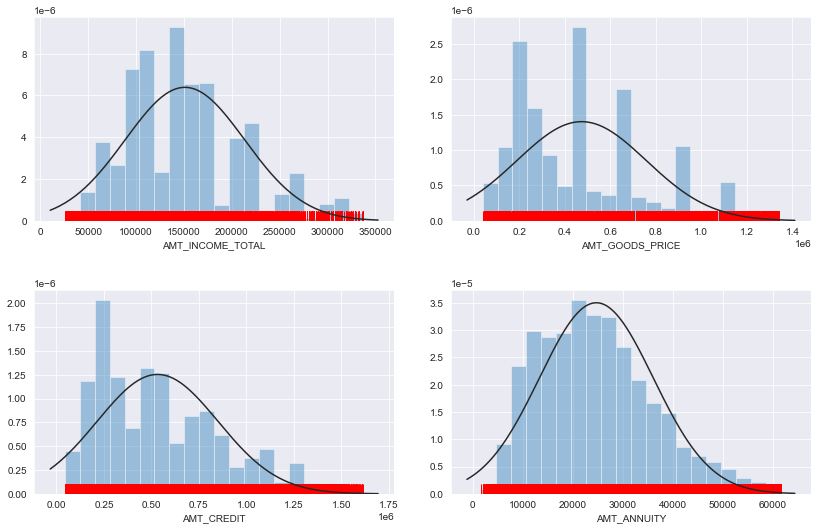

In [56]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(data.AMT_INCOME_TOTAL, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)


plt.subplot(2,2,2)
sns.distplot(data.AMT_GOODS_PRICE, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)


plt.subplot(2,2,3)
sns.distplot(data.AMT_CREDIT, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)


plt.subplot(2,2,4)
sns.distplot(data.AMT_ANNUITY, bins = 20 ,fit=norm, rug=True, rug_kws={"color": "r"},kde =False)
plt.tight_layout(pad=3.0)

#### - Normal behaviour is observed after outlier filtering.

## UNIVARIATE ANALYSIS

In [57]:
data.TARGET = data.TARGET.astype(int)

In [58]:
data.TARGET.value_counts(normalize=True)*(100)

0    91.621579
1     8.378421
Name: TARGET, dtype: float64

##### Inference: The dataset is unbalanced with a 11:1 ratio, this is manageable for EDA, but upsampling/downsampling will have to be applied if we are to perform modeling.

### Categorical Univariate

#### Generic funtion for categorical univariate plotting.

In [59]:
def data_exploration_cat(data,col,label_rotation=False,horizontal_layout=True,desc=False):
        
    temp = data[col].value_counts()
    df = pd.DataFrame({col: temp.index,'Number of Applicants': temp.values})
    plt.figure(figsize = (6,6))
        
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    
    g = sns.barplot(ax = ax1, x = col, y='Number of Applicants', data = df)
    
    if(label_rotation):
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
    for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    cat_perc = data[[col, 'TARGET']].groupby([col],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
   
    g = sns.barplot(ax = ax2, x = col, y='TARGET', order=cat_perc[col], data=cat_perc)
   
    if(label_rotation):
        g.set_xticklabels(g.get_xticklabels(),rotation=90)
    
    for p in g.patches:
        g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
    
    if(desc):
        temp = data[col].value_counts(normalize=True)
        for i in range(temp.shape[0]):
            print(f"{temp.index[i]} has total proportion of {round(temp.values[i]*100,2)} % in the columns",end="\n\n")    


##### NAME_CONTRACT_TYPE

In [60]:
data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         251585
Revolving loans     27131
Name: NAME_CONTRACT_TYPE, dtype: int64

- Only two categories exist, both are significant.

Cash loans has total proportion of 90.27 % in the columns

Revolving loans has total proportion of 9.73 % in the columns



<Figure size 432x432 with 0 Axes>

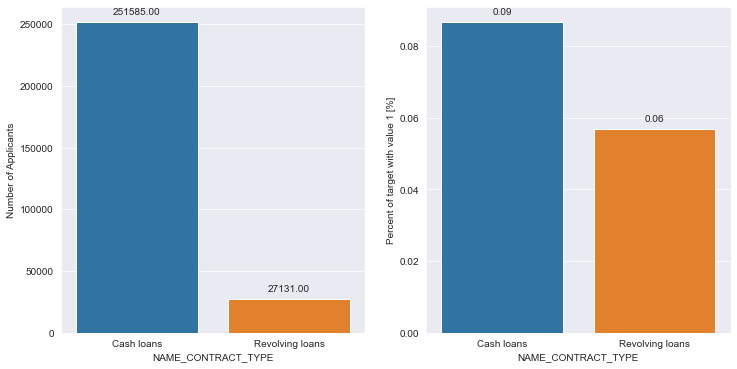

In [61]:
data_exploration_cat(data,"NAME_CONTRACT_TYPE",desc=True);

- Revolving loan is kind of credit card loan, which can be repaid again and again while cash loan is one time deal.
- Also, from Above Charts One can infer that the though the proportion of Revolving loan is low about 10% but the larger amout of the revolving loan are not repaid.

##### CNT_CHILDREN

In [62]:
data.CNT_CHILDREN.value_counts()

0     195613
1      55195
2      24092
3       3324
4        373
5         77
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

- Categories with less than 100 records are insignificant for analysis, dropping them.

In [63]:
frequency_df = pd.DataFrame(data['CNT_CHILDREN'].value_counts()).reset_index()
frequency_df.columns=['CNT_CHILDREN','count']

drop_list = list(frequency_df[frequency_df['count']<100]['CNT_CHILDREN'])
print(frequency_df)
print(drop_list)

   CNT_CHILDREN   count
0             0  195613
1             1   55195
2             2   24092
3             3    3324
4             4     373
5             5      77
6             6      21
7             7       7
8            14       3
9            19       2
10           12       2
11           10       2
12            9       2
13            8       2
14           11       1
[5, 6, 7, 14, 19, 12, 10, 9, 8, 11]


In [64]:
data1= data
data1['CNT_CHILDREN'] = data1['CNT_CHILDREN'].astype(int)

for col in drop_list:
    data1 = data1[~(data1['CNT_CHILDREN']==col)]
    
print(pd.DataFrame(data1['CNT_CHILDREN'].value_counts()))

   CNT_CHILDREN
0        195613
1         55195
2         24092
3          3324
4           373


<Figure size 432x432 with 0 Axes>

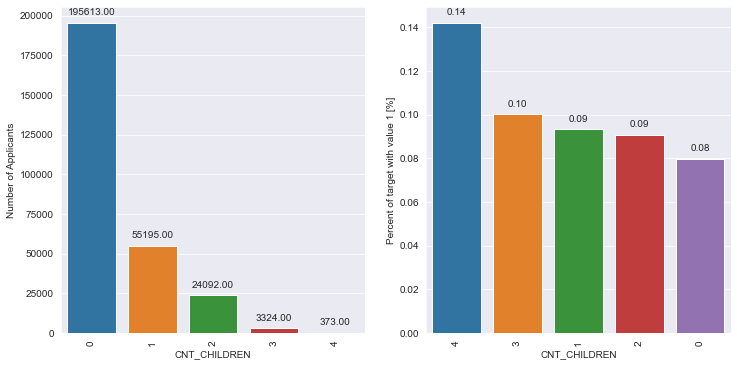

In [65]:
data_exploration_cat(data1,"CNT_CHILDREN", "likelyhood",horizontal_layout=True);

- A general trend can be observed that usually more children translates as more probablity of a default.

##### NAME_INCOME_TYPE

In [66]:
data.NAME_INCOME_TYPE.value_counts()

Working                 147109
Commercial associate     60587
Pensioner                52048
State servant            18930
Unemployed                  19
Student                     17
Maternity leave              3
Businessman                  3
Name: NAME_INCOME_TYPE, dtype: int64

- Categories with less than 100 records are insignificant for analysis, dropping them.

In [67]:
frequency_df = pd.DataFrame(data['NAME_INCOME_TYPE'].value_counts()).reset_index()
frequency_df.columns=['NAME_INCOME_TYPE','count']

drop_list = list(frequency_df[frequency_df['count']<100]['NAME_INCOME_TYPE'])
print(frequency_df)
print(drop_list)

data1= data
data1['NAME_INCOME_TYPE'] = data1['NAME_INCOME_TYPE'].astype('object')

for col in drop_list:
    data1 = data1[~(data1['NAME_INCOME_TYPE']==col)]
    
print(pd.DataFrame(data1['NAME_INCOME_TYPE'].value_counts()))

       NAME_INCOME_TYPE   count
0               Working  147109
1  Commercial associate   60587
2             Pensioner   52048
3         State servant   18930
4            Unemployed      19
5               Student      17
6       Maternity leave       3
7           Businessman       3
['Unemployed', 'Student', 'Maternity leave', 'Businessman']
                      NAME_INCOME_TYPE
Working                         147109
Commercial associate             60587
Pensioner                        52048
State servant                    18930


<Figure size 432x432 with 0 Axes>

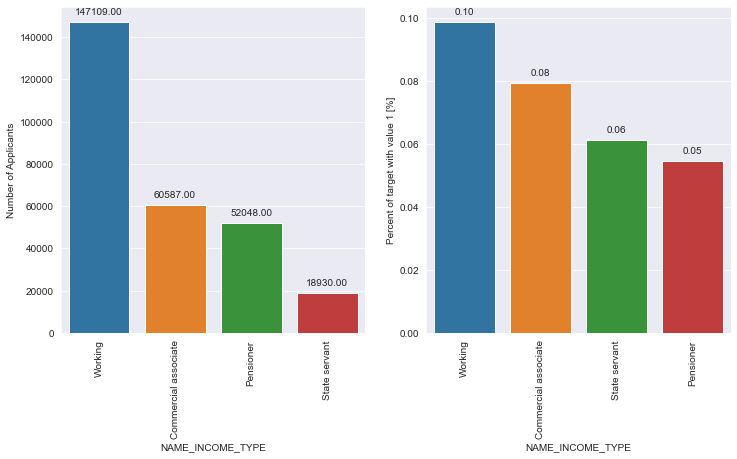

In [68]:
data_exploration_cat(data1,"NAME_INCOME_TYPE", "likelyhood");

- Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

- The applicants of Working type have almost 10% probabilty of not returning loans, followed by Commercial associates. The rest of types of incomes are under the average of 8% for not returning loans.

### Numerical Univariate

#### Generic function for numerical univariate plotting,

In [69]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_univariate_num(var,nrow=2,ncol=2):
    i = 0
    df1 = data.loc[data['TARGET'] == 1]
    df2 = data.loc[data['TARGET'] != 1]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,ncol,figsize=(14,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,ncol,i)
        sns.distplot(df1[feature], hist=False,label="Non-Defaulted")
        sns.distplot(df2[feature], hist = False, label="Defauted")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

##### AMT_ANNUITY

<Figure size 432x288 with 0 Axes>

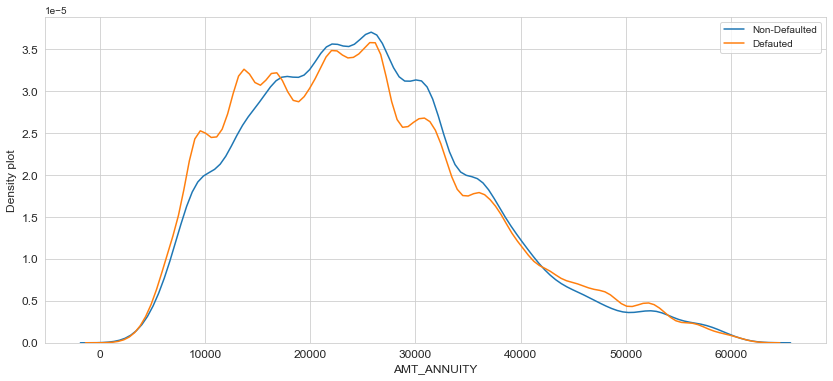

In [70]:
var = ['AMT_ANNUITY']
plot_univariate_num(var,nrow=1,ncol=1)

##### Binning Analysis

In [71]:
bin_labels= ['Low3','Low2', 'Low1',"Low0","High0" ,"High1","High2", "High3"]
print(pd.qcut(data.AMT_ANNUITY,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1]).value_counts(sort=False),end="\n\n")
      
data['Annuity Group'] = pd.qcut(data.AMT_ANNUITY,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1],
                              labels=bin_labels)

for group in bin_labels:
    print(f"{round(data[data['Annuity Group']==group].TARGET.sum()*100/len(data[data['Annuity Group']==group]),2)} % of {group} Annuity group defaulted",end="\n\n")   

(1615.499, 11659.5]    34845
(11659.5, 15952.5]     34876
(15952.5, 19953.0]     34947
(19953.0, 23719.5]     34813
(23719.5, 27004.5]     34763
(27004.5, 31653.0]     35392
(31653.0, 38263.5]     34274
(38263.5, 61659.0]     34806
Name: AMT_ANNUITY, dtype: int64

6.9 % of Low3 Annuity group defaulted

7.15 % of Low2 Annuity group defaulted

8.74 % of Low1 Annuity group defaulted

8.86 % of Low0 Annuity group defaulted

8.91 % of High0 Annuity group defaulted

9.85 % of High1 Annuity group defaulted

8.67 % of High2 Annuity group defaulted

7.92 % of High3 Annuity group defaulted



#### Inferences:- 
- It is observed that usually as the annuity amount goes on increasing, the defaulter % tends to increase as well.(Low3 -> High1)

##### AMT_CREDIT

<Figure size 432x288 with 0 Axes>

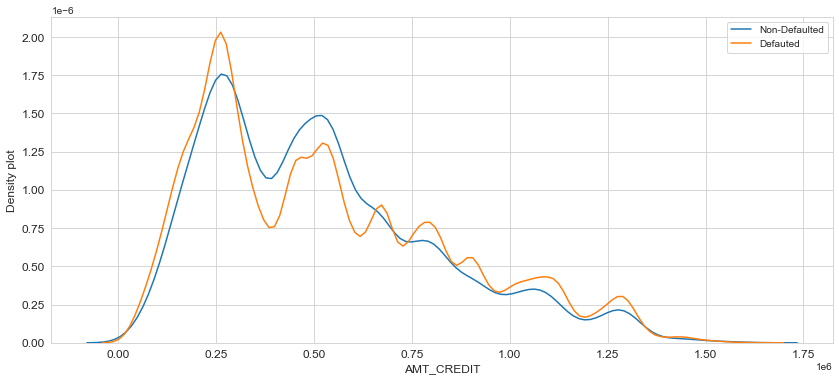

In [72]:
var = ['AMT_CREDIT']
plot_univariate_num(var,nrow=1,ncol=1)

##### Binning Analysis

In [73]:
bin_labels= ['Low3','Low2', 'Low1',"Low0","High0" ,"High1","High2", "High3"]
print(pd.qcut(data.AMT_CREDIT,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1]).value_counts(sort=False),end="\n\n")
      
data['Credit Group'] = pd.qcut(data.AMT_CREDIT,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1],
                              labels=bin_labels)

for group in bin_labels:
    print(f"{round(data[data['Credit Group']==group].TARGET.sum()*100/len(data[data['Credit Group']==group]),2)} % of {group} Credit group defaulted",end="\n\n")   

(44999.999, 193572.0]    34877
(193572.0, 269550.0]     35279
(269550.0, 343800.0]     34572
(343800.0, 474048.0]     34713
(474048.0, 578979.0]     34768
(578979.0, 755190.0]     37966
(755190.0, 943425.0]     31726
(943425.0, 1615018.5]    34815
Name: AMT_CREDIT, dtype: int64

6.83 % of Low3 Credit group defaulted

7.89 % of Low2 Credit group defaulted

8.89 % of Low1 Credit group defaulted

10.21 % of Low0 Credit group defaulted

9.89 % of High0 Credit group defaulted

9.07 % of High1 Credit group defaulted

7.36 % of High2 Credit group defaulted

6.78 % of High3 Credit group defaulted



#### Inferences:- 
- It is observed that the Low0 (3.4lac-4.7lac) credit group defaults the most, closely followed by the High0 (4.7lac-5.7lac) group

##### AMT_INCOME_TOTAL

<Figure size 432x288 with 0 Axes>

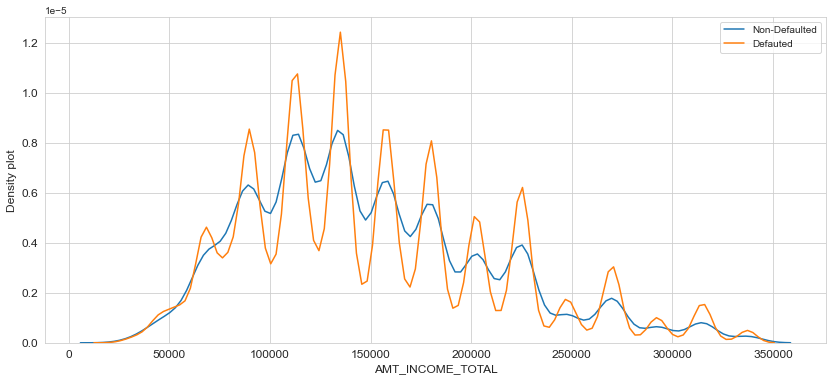

In [74]:
var = ['AMT_INCOME_TOTAL']
plot_univariate_num(var,nrow=1,ncol=1)

##### Binning Analysis

In [75]:
bin_labels= ['Low3','Low2', 'Low1',"Low0","High0" ,"High1","High2", "High3"]
print(pd.qcut(data.AMT_INCOME_TOTAL,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1]).value_counts(sort=False),end="\n\n")
      
data['Income Group'] = pd.qcut(data.AMT_INCOME_TOTAL,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1],
                              labels=bin_labels)

for group in bin_labels:
    print(f"{round(data[data['Income Group']==group].TARGET.sum()*100/len(data[data['Income Group']==group]),2)} % of {group} Income group defaulted",end="\n\n")   

(25649.999, 85500.0]    35020
(85500.0, 112500.0]     64624
(112500.0, 121500.0]     6537
(121500.0, 135000.0]    41102
(135000.0, 157500.0]    32302
(157500.0, 180000.0]    30550
(180000.0, 225000.0]    40728
(225000.0, 337500.0]    27853
Name: AMT_INCOME_TOTAL, dtype: int64

8.18 % of Low3 Income group defaulted

8.55 % of Low2 Income group defaulted

9.22 % of Low1 Income group defaulted

8.49 % of Low0 Income group defaulted

8.91 % of High0 Income group defaulted

8.6 % of High1 Income group defaulted

8.16 % of High2 Income group defaulted

7.33 % of High3 Income group defaulted



#### Inferences:- 
- It is observed that the Low1 (1.2lac-1.3lac) Income group defaults the most, closely followed by the High0 (1.35lac-1.57lac) group

##### EXT_SOURCE columns (act like credit scores)

<Figure size 432x288 with 0 Axes>

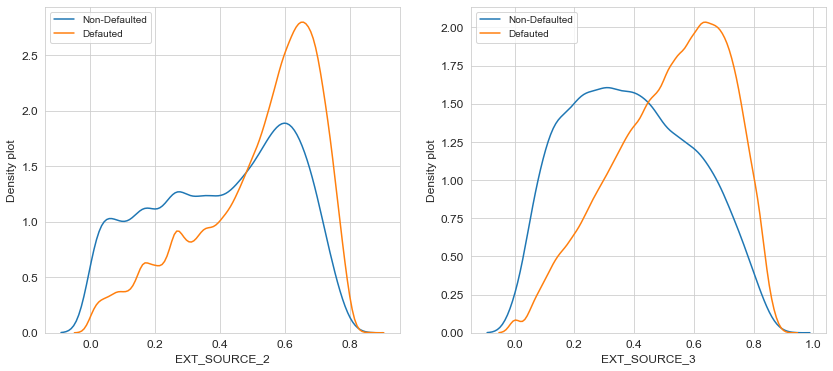

In [76]:
var = ['EXT_SOURCE_2','EXT_SOURCE_3']
plot_univariate_num(var,nrow=1)

- A general trend can be observed that these score values are lower for defaulters as compared to the non-defaulters. 

##### Binning Analysis

In [77]:
bin_labels= ['Low3','Low2', 'Low1',"Low0","High0" ,"High1","High2", "High3"]
print(pd.qcut(data.EXT_SOURCE_2,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1]).value_counts(sort=False),end="\n\n")
      
data['Score Group'] = pd.qcut(data.EXT_SOURCE_2,q=[0, .125, .25, .375 ,.5 , .625, .75, .875, 1],
                              labels=bin_labels)

for group in bin_labels:
    print(f"{round(data[data['Score Group']==group].TARGET.sum()*100/len(data[data['Score Group']==group]),2)} % of {group} Score group defaulted",end="\n\n")   

(-0.0009999183, 0.246]    34762
(0.246, 0.381]            34762
(0.381, 0.487]            34761
(0.487, 0.558]            34764
(0.558, 0.612]            34760
(0.612, 0.658]            34763
(0.658, 0.706]            34759
(0.706, 0.855]            34762
Name: EXT_SOURCE_2, dtype: int64

17.89 % of Low3 Score group defaulted

11.51 % of Low2 Score group defaulted

9.17 % of Low1 Score group defaulted

7.81 % of Low0 Score group defaulted

6.84 % of High0 Score group defaulted

5.76 % of High1 Score group defaulted

4.71 % of High2 Score group defaulted

3.35 % of High3 Score group defaulted



#### Inferences:-
- There is a clear trend of higher Score groups defaulting less and vice versa.

## BIVARIATE ANALYSIS

##### Visualizing Correlations

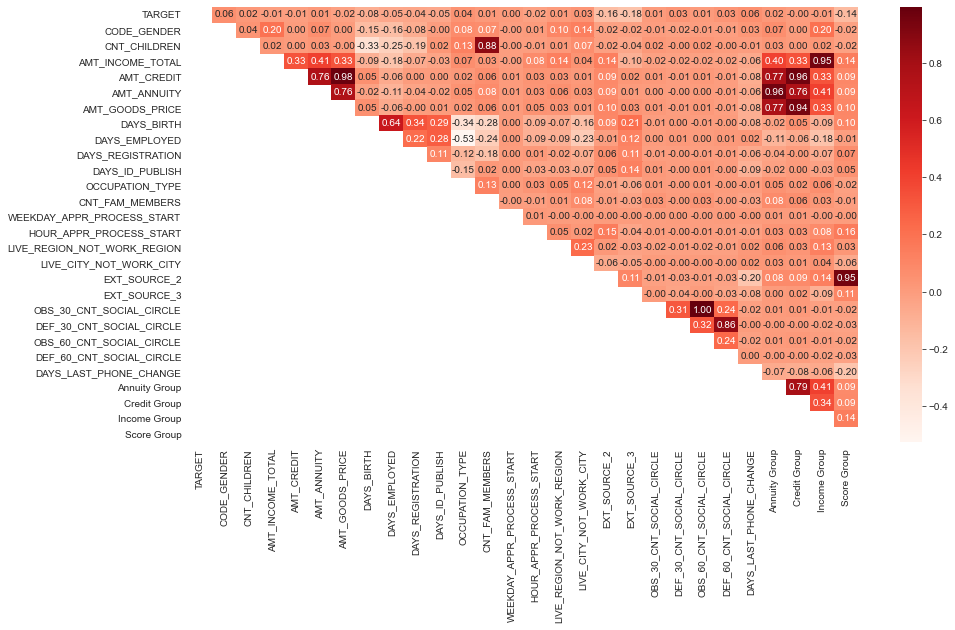

In [78]:
# Converting the object type columns into category and finally encoding to numerical values using cat codes.
df_corr = data.copy()
df_corr[df_corr.select_dtypes(include='category').columns] = df_corr.select_dtypes(include='category').astype('category').apply(lambda x: x.cat.codes)

col = [c for c in df_corr if c[:4] != 'FLAG' and c[:3] != 'REG' and c[:5] != 'SK_ID' and c[:7] != 'AMT_REQ' and c[:4] != 'NAME' and c[-1:-7] != 'CIRCLE']

df_corr = df_corr[col].corr()

df_corr = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))

plt.figure(figsize=(15,8))
sns.heatmap(df_corr,annot=True,cmap='Reds',fmt='.2f' )
plt.show()

##### Splitting dataframe on TARGET column

In [79]:
df1 = data[data['TARGET']==1]
df2 = data[data['TARGET']!=1]

### Education v/s Family Status

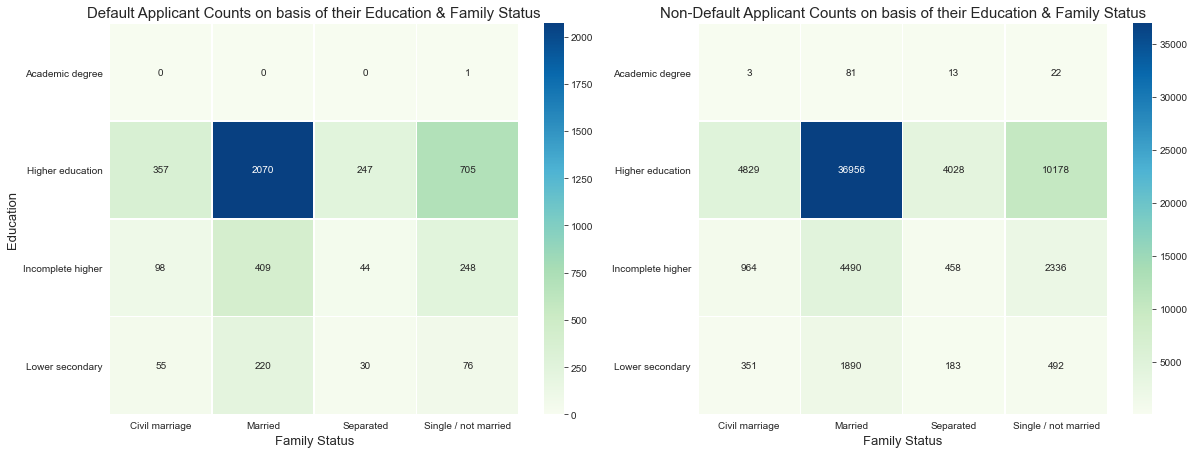

In [80]:
plt.figure(figsize=(17,12))

df_agg = pd.crosstab(df1['NAME_EDUCATION_TYPE'], df1['NAME_FAMILY_STATUS'],margins=True)
df_agg1 = pd.crosstab(df2['NAME_EDUCATION_TYPE'], df2['NAME_FAMILY_STATUS'],margins=True)

plt.subplot(2,2,1)
sns.heatmap(df_agg.iloc[:-2,:-2],annot =True, fmt ='d',cmap='GnBu', linewidths=.5)
plt.title('Default Applicant Counts on basis of their Education & Family Status',fontsize=15)
plt.xlabel('Family Status',fontsize=13)
plt.ylabel('Education',fontsize=13)

plt.subplot(2,2,2)
sns.heatmap(df_agg1.iloc[:-2,:-2],annot =True, fmt ='d',cmap='GnBu', linewidths=.5)
plt.title('Non-Default Applicant Counts on basis of their Education & Family Status',fontsize=15)
plt.xlabel('Family Status',fontsize=13)
plt.ylabel('',fontsize=13)
plt.tight_layout()
plt.show()

#### Inferences:
- Married applicants going for Higher Education default more often. 
- Also, the Married and Higher Education category are the category which need to be taken into concern, while the Academic Degree applicant won't default often.

### Occupation v/s Income Status

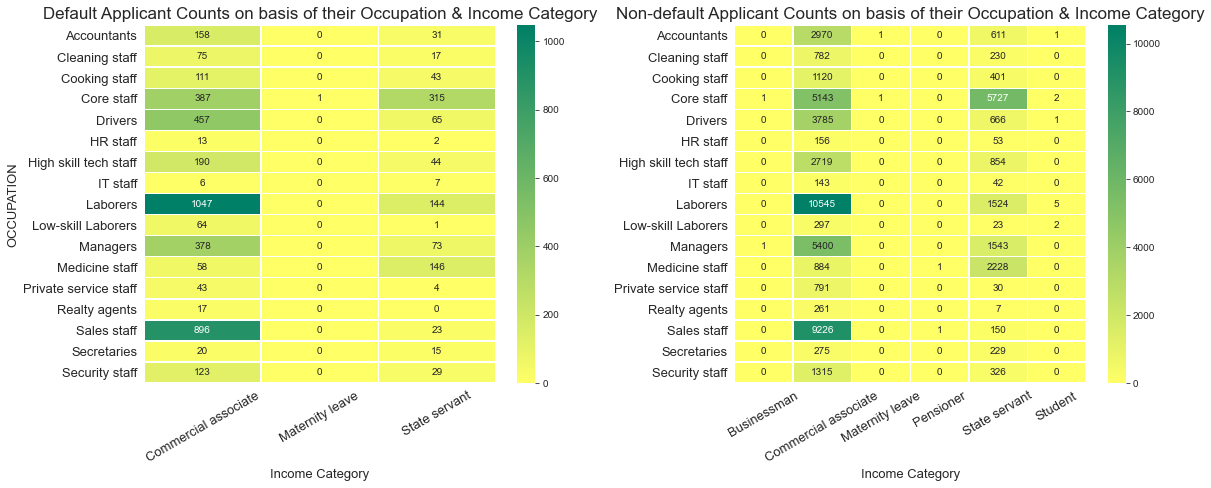

In [81]:
df_agg = pd.crosstab(df1['OCCUPATION_TYPE'],df1['NAME_INCOME_TYPE'], margins=True)
df_agg1 = pd.crosstab(df2['OCCUPATION_TYPE'],df2['NAME_INCOME_TYPE'], margins=True)

plt.figure(figsize=(17,12))

plt.subplot(221)
sns.heatmap(df_agg.iloc[:-2,:-2],annot =True, fmt ='1',cmap='summer_r',linewidths=.5)
plt.title('Default Applicant Counts on basis of their Occupation & Income Category',fontsize=17)
plt.xlabel('Income Category',fontsize=13)
plt.xticks(fontsize=13, rotation=30)
plt.yticks(fontsize=13)
plt.ylabel('OCCUPATION',fontsize=13)

plt.subplot(2,2,2)
sns.heatmap(df_agg1.iloc[:-2,:-2],annot =True, fmt ='1',cmap='summer_r',linewidths=.5)
plt.title('Non-default Applicant Counts on basis of their Occupation & Income Category',fontsize=17)
plt.xlabel('Income Category',fontsize=13)
plt.xticks(fontsize=13, rotation=30)
plt.yticks(fontsize=13)
plt.ylabel('',fontsize=13)
plt.tight_layout()
plt.show()


####  Inference:-
- People belonging to Income Categories: Pensioner and Student are unlikely to take loan or any services in terms of Credit card or Cash loan.
- Where as applicants on Maternity leave rarely opt for Loan as the risk of not being able to pay the Debt will be high ,also, the Default rate will go high if the organization starts providing them loan.
- While the applicants belonging to Commercial Associate and State Servent, and working as Labourers and Sales Staff,are most likely to avail the Loan Facility and also, the Default rate is also, high in these categories.

##### Drilling down more on correlations

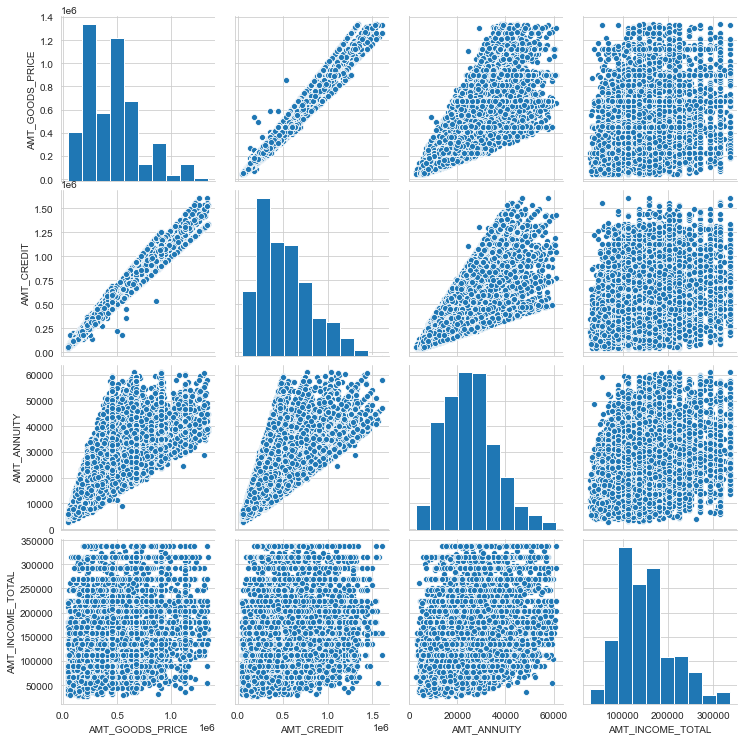

In [82]:
sns.pairplot(df1[['AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY','AMT_INCOME_TOTAL']] )
plt.show()

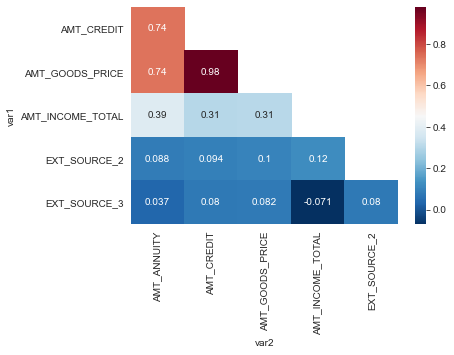

In [83]:
df1 = data[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','EXT_SOURCE_2','EXT_SOURCE_3']].loc[data['TARGET'] == 1]
corr =df1.corr()
corr =corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()
corr_df.columns = ['var1','var2','correlation']
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df['correlation_abs']=corr_df['correlation'].abs()
corr_df.sort_values("correlation_abs",ascending=False,inplace=True)
corr_df = corr_df.reset_index(drop=True)
corr_df = pd.pivot_table(data = corr_df,index ='var1',columns='var2', values='correlation')
sns.heatmap(corr_df, annot =True,cmap='RdBu_r')
plt.show()

## Insights on MERGING with Previous Application File

In [84]:
data_prev = pd.read_csv('previous_application.csv')
data_master = pd.merge(data,data_prev,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='left')

In [85]:
data_master.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Annuity Group,Credit Group,Income Group,Score Group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0,10.0,6.0,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,High0,Low0,High2,Low2,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High2,High3,High3,High1,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High2,High3,High3,High1,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High2,Hi

In [86]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300833 entries, 0 to 1300832
Columns: 113 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(60), float64(32), int32(2), int64(1), object(18)
memory usage: 600.5+ MB


In [87]:
data_master[data_master.SK_ID_PREV.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Annuity Group,Credit Group,Income Group,Score Group,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
60,100024,0,Revolving loans,M,Y,Y,0,135000.0,427500.0,21375.0,427500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.015221,50.0,12.0,1.0,5.0,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Self-employed,0.113375,NaN,0.0,0.0,0.0,0.0,-296.0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low0,Low0,Low0,Low3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51.0,7.0,18.0,5.0,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,High1,High3,Low2,Low0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,100058,0,Revolving loans,F,N,Y,0,54000.0,135000.0,6750.0,135000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.014520,34.0,3.0,3.0,7.0,1,1,0,0,0,0,Core staff,2.0,2,2,THURSDAY,9,0,0,0,0,0,0,School,0.450850,0.479449,0.0,0.0,0.0,0.0,0.0,0,1,0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low3,Low3,Low3,Low1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,38.0,7.0,15.0,11.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low3,Low1,High1,High0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,68.0,1001.0,15.0,12.

##### Inference: 13225 applications are from people who have not taken loan before.

In [88]:
data_master = data_master[~(data_master.SK_ID_PREV.isna())]

### CREDIT INCREASE %

In [89]:
data_master1 = data_master[~(data_master['AMT_CREDIT_y']==0.00)]
data_master1[~(data_master1['AMT_CREDIT_y'].isnull()==True)]

data_master1['CREDIT % Increase'] = (data_master1['AMT_CREDIT_x']-data_master1['AMT_CREDIT_y'])*100/data_master1['AMT_CREDIT_y']

In [90]:
round(data_master1['CREDIT % Increase'].describe(),2)

count    1034974.00
mean         624.67
std          963.67
min          -97.87
25%           47.64
50%          273.84
75%          795.21
max        35288.02
Name: CREDIT % Increase, dtype: float64

In [91]:
upper_fence = data_master1['CREDIT % Increase'].quantile(0.75) + (data_master1['CREDIT % Increase'].quantile(0.75) -data_master1['CREDIT % Increase'].quantile(0.25)*1.5)

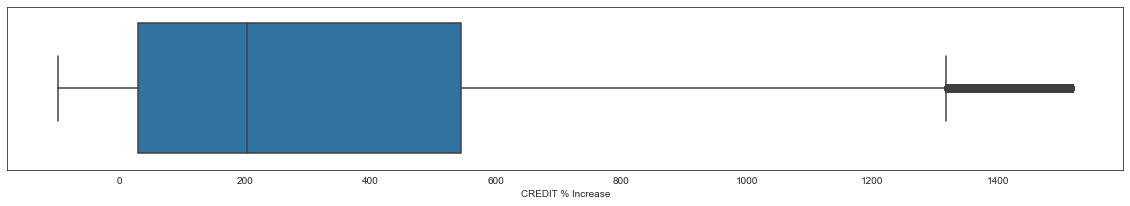

In [92]:
data_master1 = data_master1[data_master1['CREDIT % Increase']<upper_fence]
plt.figure(figsize=(20,3))
sns.set_style('white')
sns.boxplot(data_master1['CREDIT % Increase'])

##### Inference: People got a median credit increase of around 200% on their previous loan credit.

In [93]:
data_master1[data_master1['CREDIT % Increase']>0].TARGET.value_counts(normalize=True)*100

0    91.464015
1     8.535985
Name: TARGET, dtype: float64

##### Inference: 8.5 % people who got a higher credit than before, defaulted.

### CODE_REJECT_REASON

In [94]:
data_master['CODE_REJECT_REASON'].value_counts()

XAP       1042810
HC         133253
LIMIT       43544
SCO         29635
CLIENT      20862
SCOFR       10335
XNA          3999
VERIF        2564
SYSTEM        606
Name: CODE_REJECT_REASON, dtype: int64

In [95]:
data_master1 = data_master[(data_master['CODE_REJECT_REASON'] != 'XAP') & (data_master['CODE_REJECT_REASON'] != 'XNA')]

In [96]:
data_master1.TARGET.mean()*100

11.935265511899965

##### Inference: Around 12% people whose loans were rejected earler, have defaulted in current application.

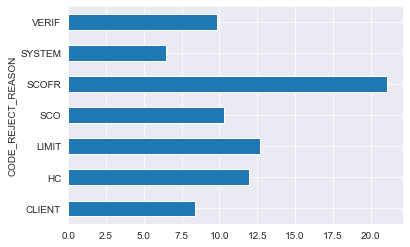

In [97]:
sns.set_style('darkgrid')
(data_master1.groupby(['CODE_REJECT_REASON']).TARGET.mean()*100).plot.barh()

##### Inference: Around 21% people whose loan applications were rejected due to SCOFR previously, have defaulted in current application.

### CHANNEL_TYPE

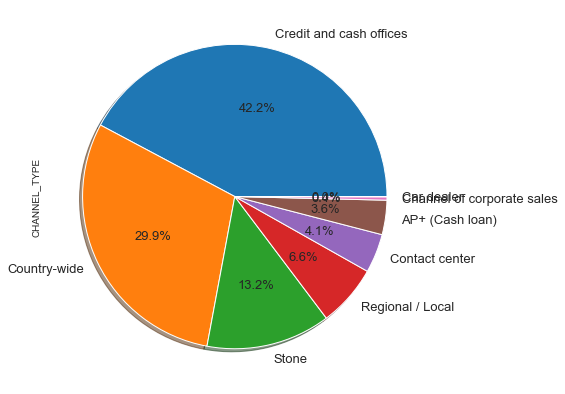

In [98]:
plt.figure(figsize=(10,7))
data_master.CHANNEL_TYPE.value_counts().plot.pie(autopct='%1.1f%%',fontsize=13,
        shadow=True)

##### Inference: The top 3 channels of acquisition for previous loan applications were Credit and cash offices, Country-wide and Stone.

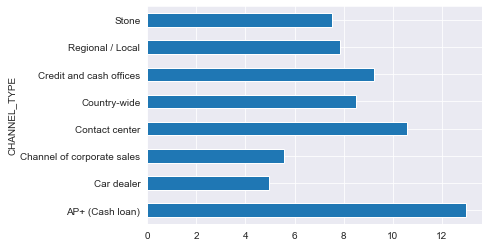

In [99]:
sns.set_style('darkgrid')
(data_master.groupby(['CHANNEL_TYPE']).TARGET.mean()*100).plot.barh()

##### Inference: Maximum defaults( 12.6%) were from applicants acquired through AP+(Cash Loan) channel, next (10.7%), the Contact Center channel.

### NAME_SELLER_INDUSTRY

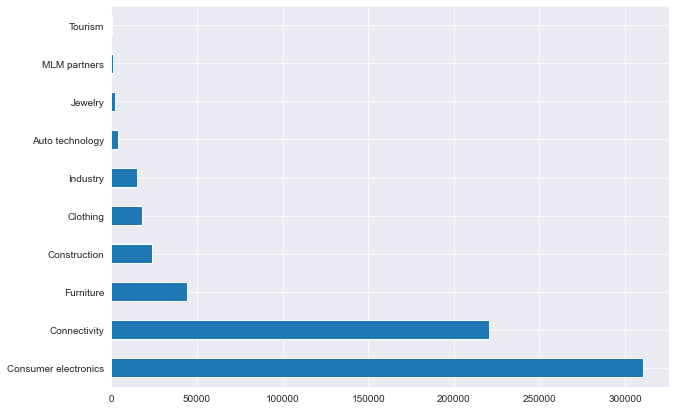

In [100]:
plt.figure(figsize=(10,7))
data_master[data_master['NAME_SELLER_INDUSTRY']!='XNA'].NAME_SELLER_INDUSTRY.value_counts().plot.barh()

##### Inference: The top 3 industies for the seller for previous loan applications were Consumer Electronics, Connectivity and Furniture.

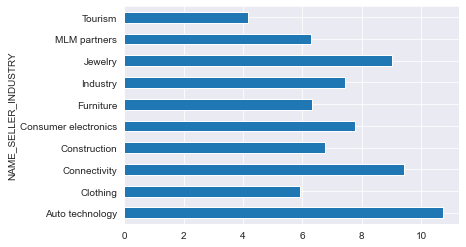

In [101]:
(data_master[data_master['NAME_SELLER_INDUSTRY']!='XNA'].groupby(['NAME_SELLER_INDUSTRY']).TARGET.mean()*100).plot.barh()

##### Inference: Maximum defaults( 10.6%) were from applicants in the Auto Technology industry, next (9.3%), the Connectivity industry.

### DAYS TERMINATION

In [102]:
# checking whether any loan application has days remaining for termination of loan application.
(data_master[data_master.DAYS_TERMINATION>0]['DAYS_TERMINATION']/365).unique()

array([1000.66575342])

##### Inference: There is clearly some kind of error here, the result shows that all the applications which exist with days remaining on previous application ,have a termination date of the previous application of 1000 years! Hence we'll ignore this (filter).

In [103]:
(data_master[data_master.DAYS_TERMINATION<0]['DAYS_TERMINATION']/365).mean()

-2.6755401427122547

##### Inference: Previous loan applications were on an average terminated 2.6 years before the current application.


# Thanks!
